No handles with labels found to put in legend.


The system has a fixed point in 0,0


No handles with labels found to put in legend.


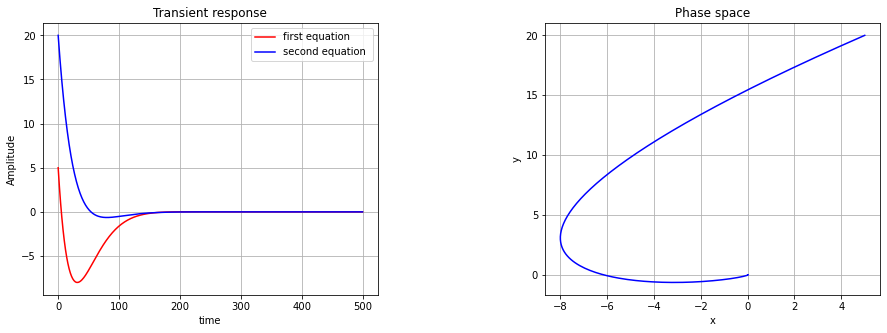

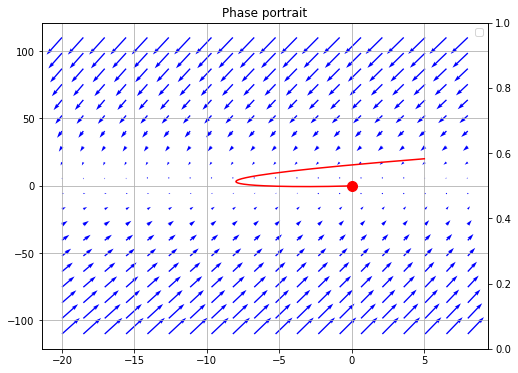

In [222]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
# define system in terms of separated differential equations
def f(x,y):
    return -2*x -5*y
def g(x,y):
    return x - 5*y

# initialize lists containing values
x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i])) * dt)
        y.append(y[i] + (g(x[i],y[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x, y
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)
# a  rondom initial value is chosen 
sys(5, 20, 0.01, 500)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='first equation ')
ax1.plot(y, 'b-', label='second equation ')
ax1.set_title("Transient response")
ax1.set_xlabel("time")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()
plt.savefig('phase-portrait.png')
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)
plt.twinx()
ax4.plot(x, y, color="r")
x = np.linspace(0,2,20)
y = np.arange(0,2,20)
size=len(fp)

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[size],"red", marker = "o", markersize = 10.0)
ax4.set_title("Phase portrait")
ax4.legend(loc='best')
# define a grid and compute direction at each point
x = np.linspace(-20, 8, 20)
y = np.linspace(110, -110, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid

u, v = np.zeros(X1.shape), np.zeros(Y1.shape)

NI, NJ = X1.shape

for i in range(NI):
    for j in range(NJ):
        x = X1[i, j]
        y = Y1[i, j]
        xprime = f(x,y)
        yprime = g(x,y)
        u[i,j] = xprime
        v[i,j] = yprime

ax4.quiver(X1, Y1, u, v,color='b')
ax4.legend()
ax4.grid()
plt.savefig('phase-portrait-2.png')

In [225]:
from sympy import symbols, diff
x, y = symbols('x y')
f = -2*x -5*y
g = x - 5*y
#partial derivative finding 
a11=float(diff(f, x))
a12=float(diff(f, y))
a21=float(diff(g, x))
a22=float(diff(g, y))
#A=np.array([[-1 ,-1],[1 ,-3]])
A = np.array([[a11,a12],[a21,a22]])
print('A= ', A)

A=  [[-2. -5.]
 [ 1. -5.]]


In [229]:
#Finding the eigen values of the A matrix 
import scipy.linalg as la
results = np.linalg.eigvals(A)
#real and imaginary part of the Lambda
real=results.real
img=results.imag
print('Eigenvalues of the system' , results)
#stablity check
leng=len(results)
n=range(leng)

for i in n :
    if (real[i] != 0 and img[i]==0):# real number 
        if img[i]!=0:# incase of entring to this condition 
                if (real[i]<0 and real[leng-1]<0):# negative e.v.
                    print('Stable focus ')
                if (real[i]>0 and real[leng-1]>0):#positive e.v
                    print('Unstable Focus ')
                if ((real[i]==0 and real[leng-1]==0) or (real[i]==0 and real[leng-1]==0) ):#sign dif
                    print('Saddle')

        if (real[i]<0 and real[leng-1]<0):# negative e.v.
                print('Stable node ')
        if (real[i]>0 and real[leng-1]>0):#positive e.v
                print('Unstable node ')
        if ((real[i]>0 and real[leng-1]<0) or (real[i]<0 and real[leng-1]>0) ):#sign dif
                print('Saddle')
        
    if ((real[i] == 0 and img[i]!=0) or (real[i] != 0 and img[i]!=0) ):# real number 
        if (real[i]<0 and real[leng-1]<0):# negative e.v.
                print('Stable focus ')
        if (real[i]>0 and real[leng-1]>0):#positive e.v
                print('Unstable Focus ')
        if ((real[i]==0 and real[leng-1]==0) or (real[i]==0 and real[leng-1]==0) ):#sign dif
                print('Saddle')






Eigenvalues of the system [-3.5+1.6583124j -3.5-1.6583124j]
Stable focus 
Stable focus 
